In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline and set style
%matplotlib inline
sns.set(style="whitegrid")

# Load data
df = pd.read_csv("airline_accidents.csv", low_memory=False)

# Clean column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r'[^\w\s]', '', regex=True)  # remove special chars
)

# Handle missing values
df = df.dropna(subset=['make', 'model'])   # drop rows missing make/model
df = df.fillna(0)                          # fill other NaNs with 0

# Quick summary
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nColumn info:")
df.info()


Dataset shape: (150959, 31)

First 5 rows:


,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_publication_date,unnamed_30
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,...,Instructional,,,,,2,VMC,LANDING,02/28/2008,
1,20080206X00141,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,,,...,Unknown,,,,,1,,,02/06/2008,
2,20080129X00122,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,...,Personal,,,,,1,VMC,TAKEOFF,02/28/2008,
3,20080114X00045,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,...,Personal,,1,,,,VMC,MANEUVERING,06/20/2014,
4,20080109X00032,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,34.688611,-87.920000,,,...,Other Work Use,,3,0,0,0,VMC,MANEUVERING,01/15/2009,



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150959 entries, 0 to 150958
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   event_id                 150959 non-null  object
 1   investigation_type       150959 non-null  object
 2   accident_number          150959 non-null  object
 3   event_date               150959 non-null  object
 4   location                 150959 non-null  object
 5   country                  150959 non-null  object
 6   latitude                 150959 non-null  object
 7   longitude                150959 non-null  object
 8   airport_code             150959 non-null  object
 9   airport_name             150959 non-null  object
 10  injury_severity          150959 non-null  object
 11  aircraft_damage          150959 non-null  object
 12  aircraft_category        150959 non-null  object
 13  registration_number      150959 non-null  object
 14  make  

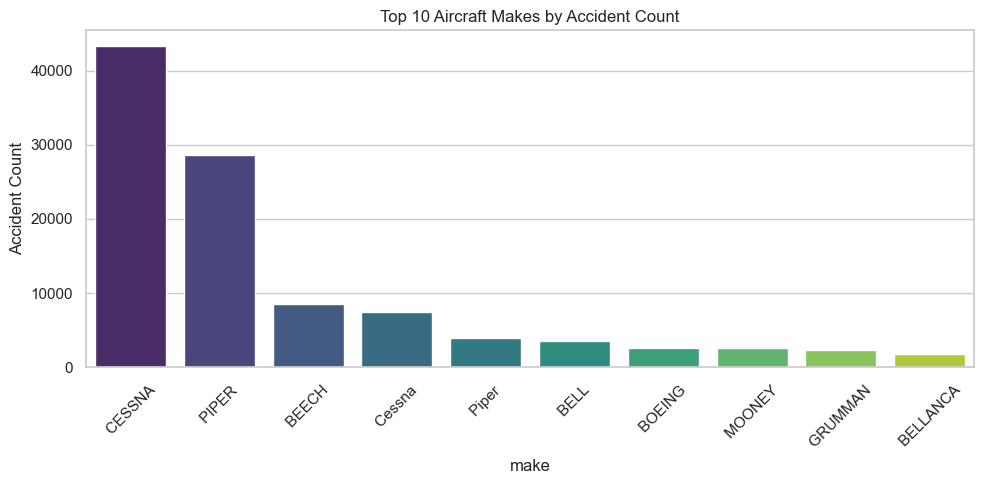

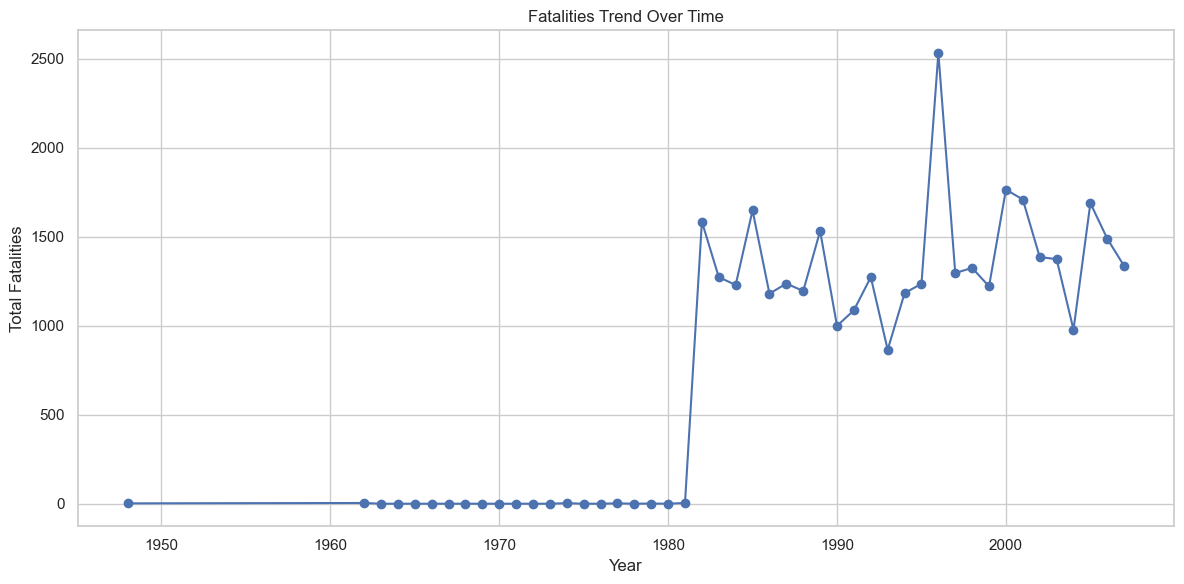

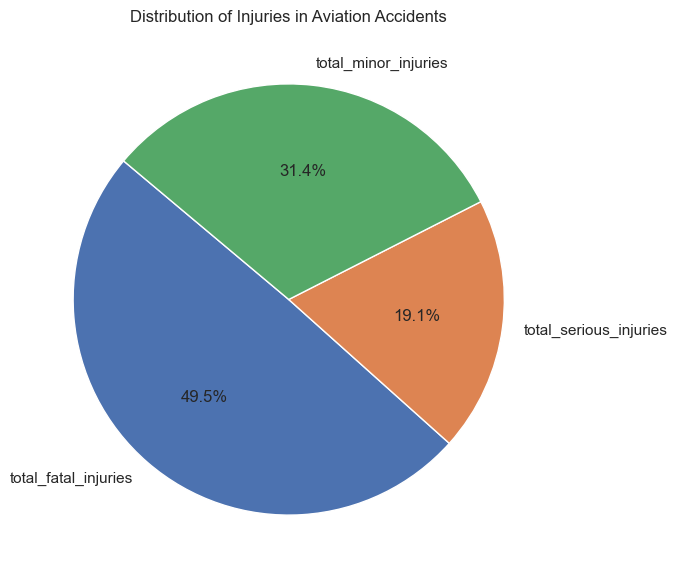

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Top 10 Aircraft Makes ---
top_makes = df['make'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")
plt.title("Top 10 Aircraft Makes by Accident Count")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top10_makes.png")
plt.show()

# --- 2. Fatalities Trend Over Time ---
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')
df['total_fatal_injuries'] = pd.to_numeric(df['total_fatal_injuries'], errors='coerce')

fatalities_trend = df.groupby(df['event_date'].dt.year)['total_fatal_injuries'].sum()

plt.figure(figsize=(12,6))
fatalities_trend.plot(kind='line', marker='o')
plt.title("Fatalities Trend Over Time")
plt.ylabel("Total Fatalities")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.savefig("fatalities_trend.png")
plt.show()

# --- 3. Distribution of Injuries ---
injuries = df[['total_fatal_injuries','total_serious_injuries','total_minor_injuries']].apply(pd.to_numeric, errors='coerce').sum()

plt.figure(figsize=(7,7))
plt.pie(injuries, labels=injuries.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Injuries in Aviation Accidents")
plt.savefig("injury_distribution.png")
plt.show()

